### Opintopistekertymät kahden ensimmäisen opiskeluvuoden aikana matematiikassa, tietojenkäsittelytieteessä ja kasvatustieteessä
Tässä notebookissa tarkastellaan matematiikan, tietojenkäsittelytieteen ja yleisen ja aikuiskasvatustieteen vuosina 2010-2015 aloittaneiden opiskelijoiden opintopistekertymiä kahden ensimmäisen opiskeluvuoden aikana. 

Tarkastelussa lukuvuosi on jaettu viiteen periodiin (4+kesä). Opiskeluperiodi tarkoittaa opiskelijakohtaista opintojen alusta laskettua periodia, ja on ilmoitettu muodossa *opiskeluvuosi.periodi*. Merkintä 1.1 tarkoittaa opiskelijan opintojen ensimmäistä periodia riippumatta siitä, missä periodissa opinnot on aloitettu. Opintopistekertymät on laskettu ilmoitetun periodin loppuun. Opintopistekertymä ajankohdassa 2.5 kuvaa tilannetta toisen kokonaisen opiskeluvuoden viimeisen periodin lopussa, eli kahden kokonaisen vuoden opiskelun jälkeen.

Opintopistekertymään on laskettu mukaan kunkin kurssin ensimmäinen hyväksytty suoritus sekä ensimmäinen suoritus, jonka arvosanaa ei ole tiedossa. Osa suorituksista, joiden arvosanoja ei ole tiedossa, ovat todennäköisesti hylättyjä suorituksia, minkä takia tässä ilmoitetut kertymät ovat luultavasti todellista hieman suurempia. Tarkastelu on tehty sillä oletuksella, että tuntemattomat arvosanat jakautuvat tasaisesti suoritusten kesken. 

In [1]:
import pandas as pd
import plotly.express as px
import pythonScripts.laske as laske
import pythonScripts.rajaa as rajaa

In [2]:
def piirraBoxplot():
    fig = px.box(kdf, x='opiskeluperiodi', y="opintopistekertymä", color='aloituslukukausi')
    fig.update_layout(xaxis_type='category')
    fig.show()

In [3]:
hakemisto = "./data/"
dfTiedostoNimi = "anon_dataset_taydennetty.csv"
bgTiedostoNimi = "student_background_taydennetty.csv"

df = pd.read_csv(hakemisto+dfTiedostoNimi, delimiter=",")
bg = pd.read_csv(hakemisto+bgTiedostoNimi, delimiter=",")
df = df.merge(bg, how="left", on="studentId")

In [4]:
# Rajataan pois opiskelijat, jotka useampaan kertaan taustatiedoissa
df = df.loc[~df['duplicate']]

# Rajataan suorituksista pois hylätyt suoritukset
df = df.loc[df['gradeSimple'] != "Hylätty"]

# Rajataan suorituksista pois saman kurssin hyväksytysti suoritetut uusintasuoritukset
df = rajaa.poista_uudemmat_suoritukset(df)

In [5]:
""" Lasketaan uusi taulukko, jossa opintopistekertymät periodeittain """
# Opintopistekertymän laskemisessa käytettävä opintojen keston ala- ja yläraja (opiskeluvuosi.opiskeluperiodi)
alaraja = 1.1
ylaraja = 2.5
kdf = laske.kumulatiivinen_opdf(df, lower_limit=alaraja, upper_limit=ylaraja, aloita_nollasta=True)

kdf['op_jakson_lopussa'] = kdf[str(ylaraja)]
sarakkeet = list(kdf.columns)
sarakkeet.insert(0, sarakkeet.pop(sarakkeet.index('op_jakson_lopussa')))
kdf = kdf.loc[:, sarakkeet]

kdf = kdf.reset_index()
kdf = pd.merge(bg, kdf, how="left", on="studentId")
kdf = kdf.fillna(0)

In [6]:
# Rajataan yli 200 op suorittaneet opiskelijat sekä pelkän maisterintutkinnon suorittavat pois
kdf = kdf.loc[(kdf['op_jakson_lopussa'] <= 200) & (~kdf['maisteriopiskelija'])]

In [7]:
kdf = kdf.melt(id_vars=list(bg.columns)+['op_jakson_lopussa'], var_name='opiskeluperiodi')
kdf = kdf.rename(columns={"value": "opintopistekertymä"})

In [8]:
# Piiretään ensimmäinen boxplot
# piirraBoxplot()

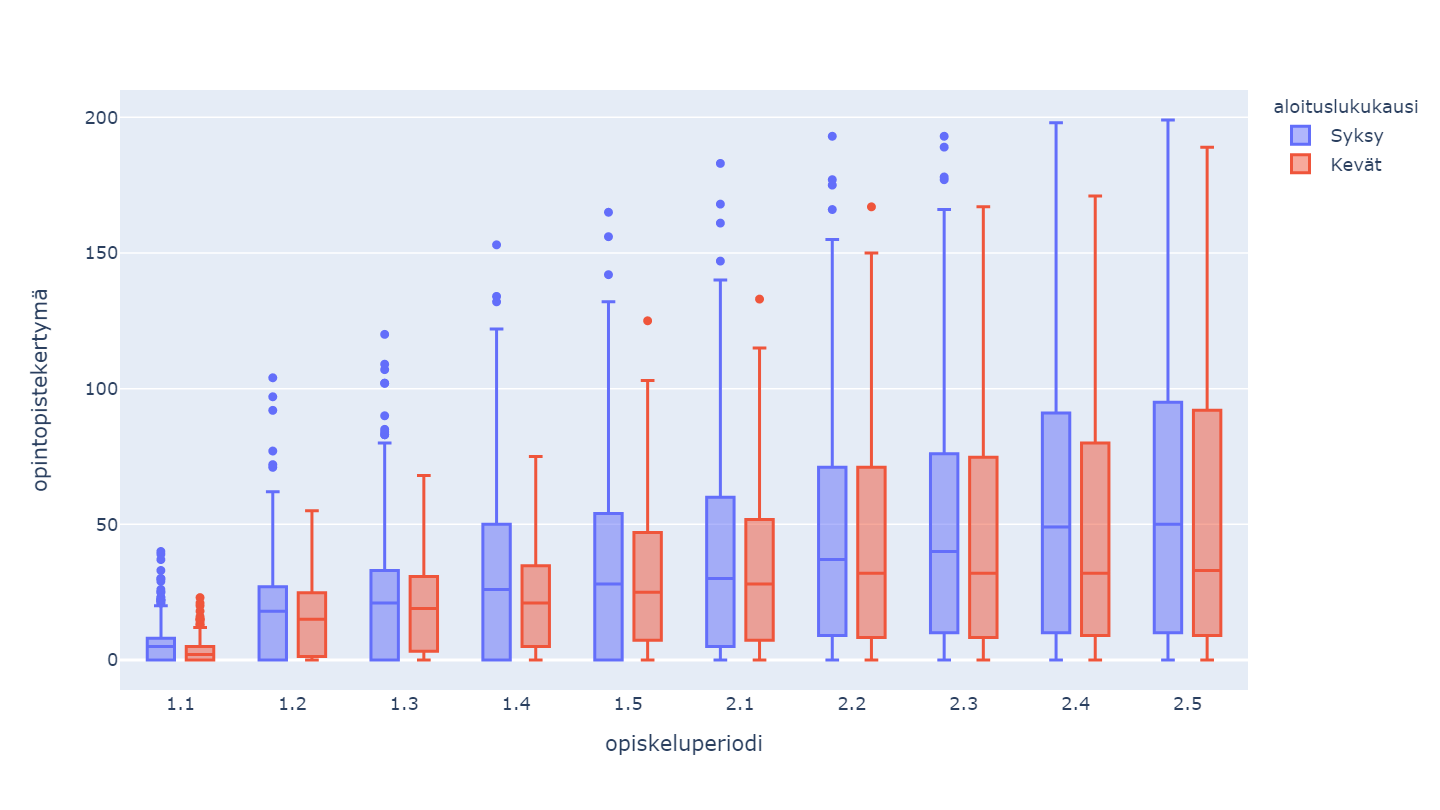
fig1.  
mukana kaikkien kolmen koulutusohjelman opiskelijat, 
- joilla vain yhden tutkinnon suoritusoikeus (ei useampia rivejä taustatiedoissa)
- joilla kahden opiskeluvuoden lopussa enintään 200 op
- jotka aloittavat opinnot kandidaatin tutkinnon opinnoista (ei pelkkiä maisteriopiskelijoita)

In [9]:
# Rajataan pois opiskelijat, joilla ei lainkaan suorituksia
kdf = kdf.loc[kdf['loytyyDatasta']]
# piirraBoxplot()

![fig2.png](/images/fig2.png)
fig2.
- aiemmat rajaukset
- rajattu pois opiskelijat, joilla tutkinnon suoritusoikeus, mutta ei datassa lainkaan suorituksia (edes hylättyjä)

Erot lukukausien välillä tasaantuvat, kun oletetut vaihto-opiskelijat rajataan pois. Vaihto-opiskelijoiksi katsotaan opiskelijat, jotka ovat suorittaneet vaihtareiden orientaatiokurssin tai opiskelleet suomen kielen alkeita.

In [10]:
# Rajataan pois oletetut vaihto-opiskelijat
kdf = kdf.loc[(~kdf['vaihtari']) & (~kdf['opiskellutSuomea'])]
# piirraBoxplot()

![fig3.png](/images/fig3.png)
fig3.
- rajattu pois oletetut vaihto-opiskelijat (suorittaneet vaihto-opiskelijoiden orientaatiokurssin tai opiskelleet suomen alkeita)

Rajattu joukko on tässä vaiheessa vielä moninainen. Suurella osalla opiskelijoista on esimerkiksi pidempi aiempi opiskelutausta. Kun tarkasteluun otetaan vain opiskelijat, joilla on vähemmän kuin 50 op suorituksia ennen opintojen aloittamista, erot eri lukukausina aloittaneiden välillä kasvavat suuremmiksi. 

In [11]:
# Rajataan pois opiskelijat, joilla yli 50 op suorituksia opintojen alkaessa
kdf = kdf.loc[kdf['opOpintojenAlkaessa'] <= 50]
# piirraBoxplot()

![fig4.png](/images/fig4.png)
fig4.
- rajattu niihin opiskelijoihin, joilla on enintään 50 op aiempia opintoja ennen opintojen aloittamista

Erot ovat vielä suuremmat, kun tarkastellaan vain niitä opiskelijoita, joilla ei ole aiempia suorituksia ennen opintojen aloittamista

In [12]:
# Rajataan tarkasteluun vain opiskelijat, joilla ei ole suorituksia opintojen alkaessa
kdf = kdf.loc[kdf['opOpintojenAlkaessa'] <= 0]
# piirraBoxplot()

![fig5.png](/images/fig5.png)
fig5.
- rajattu niihin opiskelijoihin, joilla ei ole lainkaan aiempia opintoja ennen opintojen aloittamista. Rajattu joukko kuvaa siis täysin uusia opiskelijoita, jotka aloittavat opintonsa kandidaatin tutkinnon alusta ilman aiempaa opiskelukokemusta.

Kun koulutusohjelmia tarkastellaan erikseen, huomataan että suurimmat erot paikantuvat tietojenkäsittelytieteeseen, jossa tosin rajausten mukaisten keväällä aloittaneiden opiskelijoiden määrä putoaa pieneksi. Matematiikassa opintopistekertymän mediaanit ovat samalla tasolla lukukausien välillä. Kasvatustieteissä ei ole ollut rajausten mukaisia keväällä aloittaneita opiskelijoita. 

In [13]:
num = 6
for ko in kdf['koulutusohjelma'].unique():
    ko_kdf = kdf.loc[kdf['koulutusohjelma'] == ko]
    n = [": ".join([lk, str(ko_kdf.loc[ko_kdf['aloituslukukausi'] == lk, 'studentId'].nunique())]) for lk in ko_kdf['aloituslukukausi'].unique()]
    n = ", ".join(n)
    n = "n = " + n

    # fig = px.box(ko_kdf, x='opiskeluperiodi', y="opintopistekertymä", color='aloituslukukausi')
    # fig.update_layout(xaxis_type='category', title=" ".join(['Opintopistekertymä periodeittain:', ko, n]))
    # fig.update_yaxes(range=[-5, 205])
    # num += 1
    # fig.show()

![fig6.png](/images/fig6.png)
![fig7.png](/images/fig7.png)
![fig8.png](/images/fig8.png)
fig6 - fig8.
- kuviot aiemmilla rajauksilla koulutusohjelmittain

Alla on kuvattu vähintään 180 opintopistettä suorittaneiden opiskelijoiden osuudet koulutusohjelmittain aloituslukukauden mukaan. Keväällä aloittaneista harvempi on suorittanut vähintään 180 opintopistettä kuin syksyllä aloittaneistä sekä matematiikan että tietojenkäsittelytieteen opiskelijoista. Tietojenkäsittelytieteen rajausten mukaisista keväällä aloittaneista opiskelijoista vain yksi on suorittanut yli 180 opintopistettä.

In [14]:
laskentasarake = '180_op_suoritettu'
tulossarake = '% ryhmästä suorittanut 180 op'
df180 = bg.loc[bg['studentId'].isin(kdf['studentId'])]
df180 = df180.groupby(['koulutusohjelma','aloituslukukausi', laskentasarake])
df180 = pd.DataFrame(df180['studentId'].nunique())
df180[tulossarake] = (df180.studentId / df180.groupby(['koulutusohjelma','aloituslukukausi']).studentId.transform(sum)) * 100
df180 = df180.reset_index()
df180 = df180.loc[df180[laskentasarake]]
df180.drop(columns=[laskentasarake, 'studentId'], inplace=True)
df180 = df180.round(1)
df180.sort_values(['koulutusohjelma', 'aloituslukukausi'], ascending=False, inplace=True)

# fig = px.bar(df180, y='koulutusohjelma', x=tulossarake, color='aloituslukukausi', barmode='group', text=tulossarake, orientation='h')
# fig.update_traces(textposition='outside')
# fig.update_xaxes(range=[0, 100])
# fig.show()

![fig9.png](/images/fig9.png)
fig9.
- vähintään 180 op koko opintojen aikana suorittaneiden osuus aiemmin rajatusta uusien opiskelijoiden ryhmästä

Niillä opiskelijoilla, jotka suorittavat vähintään 180 op, aloituslukukaudella ei näytä olevan suurempaa vaikutusta suoritustahtiin. Alla on kuvattu 180 op saavuttamiseen kulunut aika periodeissa matematiikan opiskelijoiden joukossa. Keväällä aloittaneet matematiikan opiskelijat ovat saavuttaneet 180 op kutakuinkin samassa tahdissa kuin syksyllä aloittaneet, keskimäärin jopa hieman nopeammin. Tietojenkäsittelyn kohdalla tarkastelua ei ole mielekästä tehdä, koska vain yksi rajausten mukainen opiskelija oli suorittanut 180 op. 

In [15]:
bg.rename(columns={'180_op_opiskeluperiodi': '180 op:een saavuttamisaika periodeissa'}, inplace=True)
mat180_suoritusajat = bg.loc[(bg['studentId'].isin(kdf['studentId'])) & (bg['koulutusohjelma'] == 'Matematiikan koulutusohjelma')]
# fig = px.box(mat180_suoritusajat, y="180 op:een saavuttamisaika periodeissa", color='aloituslukukausi')
# fig.show()


![fig10.png](/images/fig10.png)
fig10.
- 180 op saavuttamisen kesto periodeissa niillä matematiikan opiskelijoilla, jotka ovat suorittaneet vähintään 180 op

-> Aloituslukukaudella ei näytä olevan merkittävää yhteyttä opintopisteiden kertymistahtiin niillä opiskelijoilla jotka pysyvät opintojen parissa. Uusilla opiskelijoilla aloituslukukausi näyttää kuitenkin olevan yhteydessä opintojen pysähtymiseen. 